# ***Bipartite graphs***

In [11]:
import networkx as nx
from networkx import bipartite
import matplotlib.pyplot as plt

***A graph becomes a bipartite graph when its nodes can be split into two groups where very edge connects one node in one group to one in the other group.***

In [3]:
# eg. consider a network of basketball fans and basketball teams
# a person can be a fan of more than one teams
# but a fan is rarely a fan of another fan
# so it doesn't make sense to establish fandom relations between fans
# similarly two basketball teams are rarely fans of one another
# again, it makes little sense to make fandom relations between two teams
# this leads to a segregation between nodes: a group consisting fans and the other consisting teams
# nodes of one segregate have relationships with nodes of the other segregate but not within themselves!!!
# this creates a grouping

In [4]:
# no two nodes in fans group are connected, similarly no two nodes in teams group are connected

In [22]:
# networkx does not have a built in class for bipartite graphs
# but there's a workaround

bpgraph = nx.DiGraph()

fans = ["James", "Julie", "Jane", "Joanne", "Jasper", "Leslie", "Ruby", "Ramierez", "Cabello", "Martinez", "Lorah"]
teams = ["Red Socs", "Lakers", "Dumbasses", "Losers"]

bpgraph.add_nodes_from(fans, partition = "fans")
bpgraph.add_nodes_from(teams, partition = "teams")

In [23]:
bpgraph.add_edges_from([("James", "Lakers"), ("Julie", "Dumbasses"), ("Jane", "Lakers"), 
                        ("Joanne", "Dumbasses"), ("Jasper", "Dumbasses"), ("Leslie", "Red Socs"), ("Ruby", "Red Socs"), 
                        ("Ramierez", "Red Socs"), ("Cabello", "Losers"), ("Martinez", "Losers"), ("Lorah", "Red Socs")])

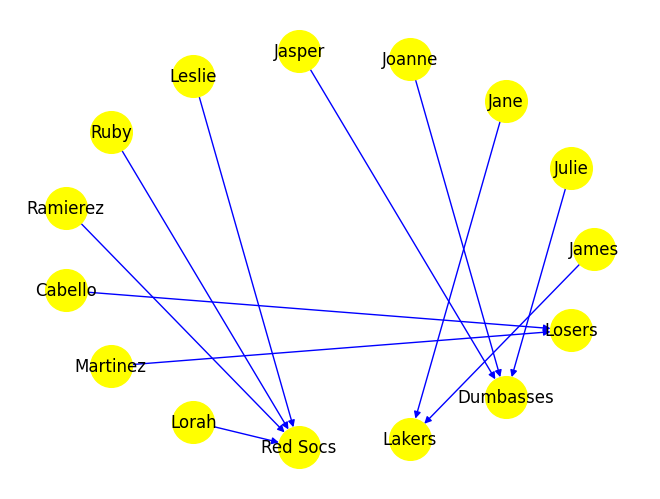

In [24]:
positions = nx.circular_layout(bpgraph)

nx.draw(bpgraph, node_color = "yellow", edge_color = "blue", font_color = "black", node_size = 900, with_labels = True, pos = positions)

In [15]:
bipartite.is_bipartite(bpgraph)

True

In [16]:
# linking two fans
bpgraph.add_edge("Lorah", "Cabello")

In [17]:
bipartite.is_bipartite(bpgraph)

True

In [33]:
bpgraph.nodes()

NodeView(('James', 'Julie', 'Jane', 'Joanne', 'Jasper', 'Leslie', 'Ruby', 'Ramierez', 'Cabello', 'Martinez', 'Lorah', 'Red Socs', 'Lakers', 'Dumbasses', 'Losers'))

In [32]:
nx.get_node_attributes(bpgraph, "partition")

{'James': 'fans',
 'Julie': 'fans',
 'Jane': 'fans',
 'Joanne': 'fans',
 'Jasper': 'fans',
 'Leslie': 'fans',
 'Ruby': 'fans',
 'Ramierez': 'fans',
 'Cabello': 'fans',
 'Martinez': 'fans',
 'Lorah': 'fans',
 'Red Socs': 'teams',
 'Lakers': 'teams',
 'Dumbasses': 'teams',
 'Losers': 'teams'}

In [41]:
# teams in #E1F357
# fans in #8D1B57

partition_dict = nx.get_node_attributes(bpgraph, "partition")
cdict = {"fans": "#8D1B57", "teams": "#036E57"}

clist = [cdict.get(partition_dict.get(node)) for node in bpgraph.nodes()]
clist

['#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#8D1B57',
 '#036E57',
 '#036E57',
 '#036E57',
 '#036E57']

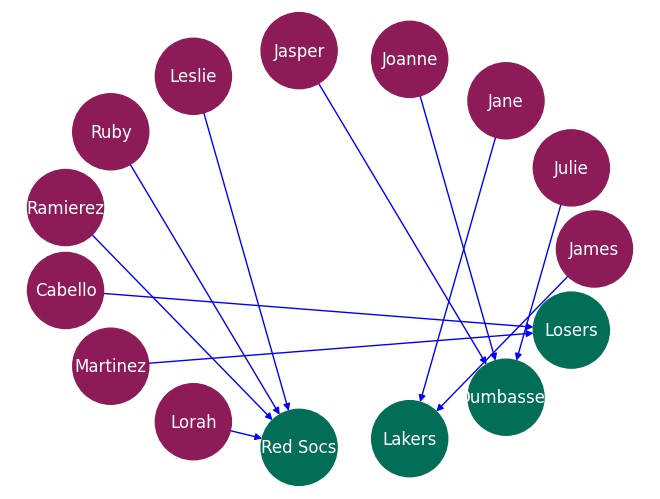

In [42]:
positions = nx.circular_layout(bpgraph)

nx.draw(bpgraph, node_color = clist, edge_color = "blue", font_color = "white", node_size = 3000, with_labels = True, pos = positions)

In [43]:
bipartite.is_bipartite(bpgraph)

True

In [44]:
# lets connect two nodes in fans
bpgraph.add_edge("Ruby", "Jasper")

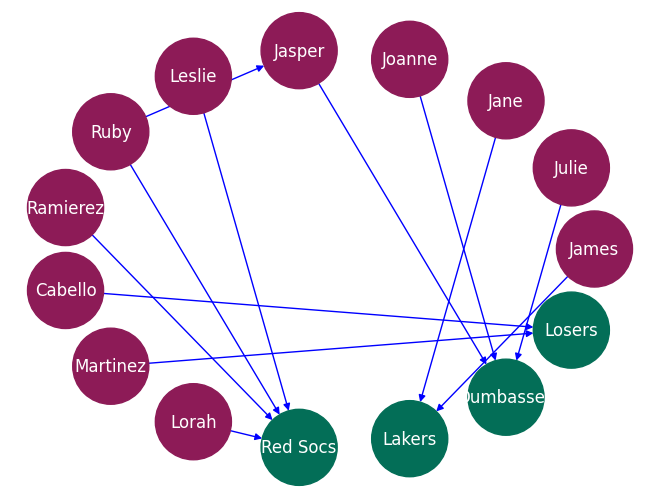

In [47]:
# note the edge connecting Jasper & Ruby
nx.draw(bpgraph, node_color = clist, edge_color = "blue", font_color = "white", node_size = 3000, with_labels = True, pos = positions)

In [48]:
bipartite.is_bipartite(bpgraph)

True

In [49]:
# whoops

In [63]:
_bpgraph = nx.Graph()

fans = ["James", "Julie", "Jane", "Joanne", "Jasper", "Leslie", "Ruby", "Ramierez", "Cabello", "Martinez", "Lorah"]
teams = ["Red Socs", "Lakers", "Dumbasses", "Losers"]

_bpgraph.add_nodes_from(fans, bipartite = "fans")
_bpgraph.add_nodes_from(teams, bipartite = "teams")

_bpgraph.add_edges_from([("James", "Lakers"), ("Julie", "Dumbasses"), ("Jane", "Lakers"), 
                        ("Joanne", "Dumbasses"), ("Jasper", "Dumbasses"), ("Leslie", "Red Socs"), ("Ruby", "Red Socs"), 
                        ("Ramierez", "Red Socs"), ("Cabello", "Losers"), ("Martinez", "Losers"), ("Lorah", "Red Socs")])

partition_dict = nx.get_node_attributes(_bpgraph, "bipartite")
cdict = {"fans": "#8D1B57", "teams": "#036E57"}

clist = [cdict.get(partition_dict.get(node)) for node in _bpgraph.nodes()]
_positions = nx.circular_layout(_bpgraph)

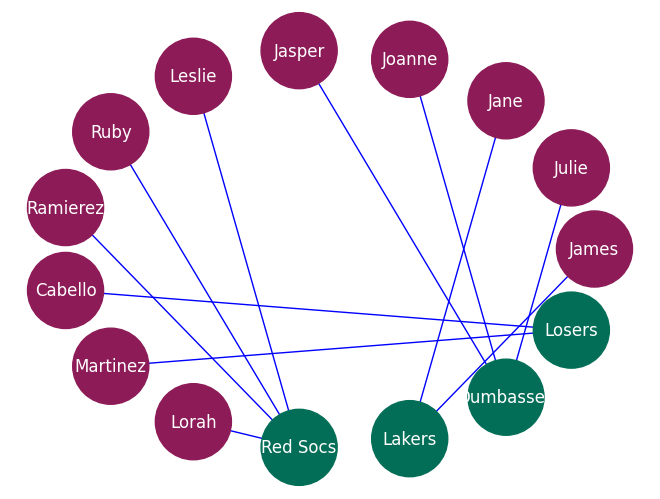

In [64]:
nx.draw(_bpgraph, node_color = clist, edge_color = "blue", font_color = "white", node_size = 3000, with_labels = True, pos = _positions)

In [65]:
bipartite.is_bipartite(_bpgraph)

True

In [66]:
_bpgraph.add_edge("Lorah", "Martinez")

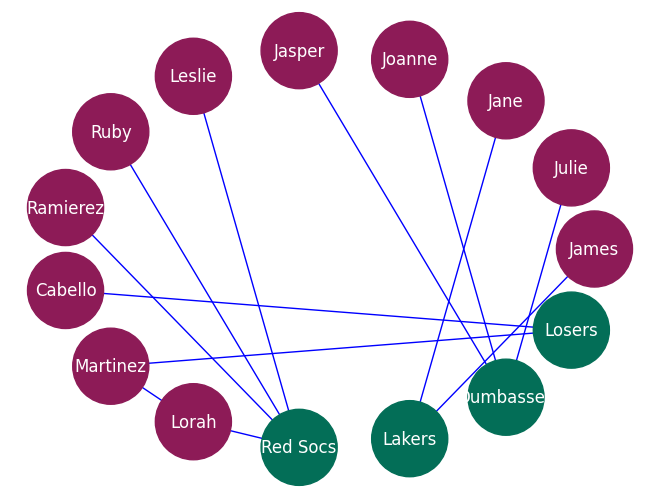

In [67]:
nx.draw(_bpgraph, node_color = clist, edge_color = "blue", font_color = "white", node_size = 3000, with_labels = True, pos = _positions)

In [70]:
# wtf
bipartite.is_bipartite(_bpgraph)

True

In [76]:
bipartite.is_bipartite_node_set(_bpgraph, fans)

False

In [77]:
bipartite.is_bipartite_node_set(_bpgraph, teams)

False

In [80]:
bipartite.sets(bpgraph)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.